In [40]:
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [41]:
def loadData(fileNameStr):
    df = pd.read_csv(fileNameStr,sep=' ', header=None)
    df.columns = ['cityNumber', 'x', 'y']
    xs = df.y
    ys = df.x
    return xs, ys

In [42]:
xs, ys = loadData('Qatar_194_coordinates.tsp')
numPoints = len(xs)

In [43]:
#function used to build the distance matrix
def distance(point1, point2):
    return np.sqrt(sum((point1-point2)**2))

def createDistanceMatrix(xs, ys):
    numPoints = len(xs)
    dists = np.ndarray((numPoints,numPoints))
    for i in range(numPoints):
        dists[i,i] = 0
        for j in range(i+1,numPoints):
            dists[i,j] = distance(np.array([xs[i],ys[i]]), np.array([xs[j],ys[j]]))
            dists[j,i] = dists[i,j]   
    return dists

In [44]:
dists = createDistanceMatrix(xs, ys)

In [45]:
def routeLength(path, distancesMatrix):
    curLength = distancesMatrix[0,path[0]]
    for i in range(len(path)-1):
        curLength += distancesMatrix[path[i], path[i+1]]
    curLength += distancesMatrix[path[-1],0]
    return curLength

In [46]:
curPath = np.array([i for i in range(1,numPoints)])
curLength = routeLength(curPath, dists)
print(curPath)
print(curLength)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193]
39555.63359710213


In [47]:
def computeBestPath(xs, ys):

    g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
    path = []     #points used in the path
    path_x = []   #x values of points, used to update g
    path_y = []   #y values of points, used to update
    outstanding = [i for i in range(numPoints)] 

    # find 3 closest points to g
    sortedOutstanding = sorted(outstanding, key = lambda i: distance(g,np.array([xs[i],ys[i]])))
    for i in range(3):
        path.append(sortedOutstanding[i])
        path_x.append(xs[sortedOutstanding[i]])
        path_y.append(ys[sortedOutstanding[i]])

    #remove from sortedOutstanding by value
    for i in range(3):
        outstanding.remove(path[i])

    for count in range(0, numPoints-3):
    #for count in range(0, 1):    
        g = np.array([np.mean(path_x),np.mean(path_y)])
        #find closest point to g in list of outstanding points
        minDist = distance(g,np.array([xs[outstanding[0]],ys[outstanding[0]]]))
        minPos = 0
        for i in range(1, len(outstanding)):
            compDist = distance(g,np.array([xs[outstanding[i]],ys[outstanding[i]]]))
            if compDist < minDist:
                minDist = compDist
                minPos = i
        pNewName = outstanding[minPos]
        pNew = np.array([xs[pNewName],ys[pNewName]])

        p = np.array([xs[path[-1]],ys[path[-1]]])
        pNext = np.array([xs[path[0]],ys[path[0]]])
        minDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
        minPos = -1
        for i in range(len(path)-1):
            p = np.array([xs[path[i]],ys[path[i]]])
            pNext = np.array([xs[path[i+1]],ys[path[i+1]]])
            compDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
            if compDist < minDist:
                minDist = compDist
                minPos = i
        path.insert(minPos+1, pNewName)
        path_x.append(xs[pNewName])
        path_y.append(ys[pNewName])
        outstanding.remove(pNewName)

    zeroPos = path.index(0)
    res = path[zeroPos+1:] + path[:zeroPos]
        
    return res

In [48]:
startTime = time.time()
bestPathTest = computeBestPath(xs, ys)
endTime = time.time()
runTime = endTime - startTime
print(runTime)
bestPathLength = routeLength(bestPathTest, dists)

2.390113353729248


In [49]:
print(bestPathTest)
print(bestPathLength)

[1, 2, 6, 16, 20, 17, 27, 21, 28, 56, 44, 82, 78, 80, 69, 63, 67, 65, 36, 26, 11, 8, 9, 4, 14, 18, 38, 50, 46, 33, 39, 42, 37, 40, 45, 47, 43, 30, 31, 29, 34, 41, 49, 48, 54, 53, 51, 52, 55, 57, 60, 66, 72, 76, 83, 91, 96, 99, 109, 111, 114, 122, 123, 127, 119, 132, 142, 147, 134, 128, 135, 130, 120, 116, 115, 117, 121, 164, 173, 172, 174, 185, 186, 189, 193, 182, 183, 188, 191, 190, 187, 192, 176, 180, 177, 179, 167, 169, 184, 170, 166, 158, 157, 161, 165, 159, 154, 150, 146, 151, 140, 143, 152, 149, 156, 153, 138, 137, 118, 107, 106, 104, 105, 102, 101, 108, 112, 113, 125, 124, 136, 141, 145, 163, 178, 171, 181, 175, 168, 162, 160, 155, 148, 144, 139, 133, 131, 126, 129, 110, 103, 100, 98, 93, 97, 85, 84, 64, 19, 89, 88, 81, 61, 62, 35, 58, 79, 86, 90, 92, 94, 95, 87, 77, 74, 75, 70, 71, 73, 68, 59, 32, 25, 23, 24, 22, 15, 5, 7, 12, 13, 10, 3]
12060.236506070274


In [50]:
def computeBestPath2(xs, ys):

    curPoint = np.array([xs[0],ys[0]])
    path = []     #points used in the path
    path_x = []   #x values of points, used to update g
    path_y = []   #y values of points, used to update
    outstanding = [i for i in range(1,numPoints)] 
    
    path.append(0)
    
    for count in range(0, numPoints-1):
        sortedOutstanding = sorted(outstanding, key = lambda i: distance(curPoint,np.array([xs[i],ys[i]])))
        pNewName = sortedOutstanding[0]
        path.append(pNewName)
        outstanding.remove(sortedOutstanding[0])
        curPoint = np.array([xs[pNewName],ys[pNewName]])

    zeroPos = path.index(0)
    res = path[zeroPos+1:] + path[:zeroPos]
        
    return res

In [51]:
def computeBestPath2b(xs, ys):

    g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
    path = []     #points used in the path
    path_x = []   #x values of points, used to update g
    path_y = []   #y values of points, used to update
    outstanding = [i for i in range(numPoints)] 

    # find 3 closest points to g
    sortedOutstanding = sorted(outstanding, key = lambda i: distance(g,np.array([xs[i],ys[i]])))
    
    first = sortedOutstanding[0]
    path.append(first)
    outstanding.remove(first)
    
    curPoint = np.array([xs[first],ys[first]])
    
    for count in range(0, numPoints-1):
        sortedOutstanding = sorted(outstanding, key = lambda i: distance(curPoint,np.array([xs[i],ys[i]])))
        pNewName = sortedOutstanding[0]
        path.append(pNewName)
        outstanding.remove(sortedOutstanding[0])
        curPoint = np.array([xs[pNewName],ys[pNewName]])

    zeroPos = path.index(0)
    res = path[zeroPos+1:] + path[:zeroPos]
        
    return res

In [52]:
startTime = time.time()
bestPathTest2 = computeBestPath2(xs, ys)
endTime = time.time()
runTime = endTime - startTime
print(runTime)
bestPathLength2 = routeLength(bestPathTest2, dists)
print(bestPathTest2)
print(bestPathLength2)

0.7717561721801758
[5, 7, 15, 12, 13, 10, 16, 25, 23, 20, 17, 32, 27, 28, 21, 26, 36, 38, 46, 50, 57, 55, 52, 51, 47, 45, 40, 37, 39, 42, 53, 54, 48, 41, 43, 34, 31, 29, 30, 33, 60, 66, 65, 72, 67, 63, 69, 76, 78, 80, 82, 87, 91, 94, 95, 92, 96, 104, 105, 106, 107, 109, 111, 114, 115, 116, 120, 119, 127, 122, 123, 132, 134, 128, 130, 135, 147, 142, 154, 150, 146, 151, 152, 149, 143, 153, 156, 140, 138, 137, 141, 145, 148, 144, 139, 136, 133, 131, 126, 124, 125, 113, 112, 108, 101, 102, 90, 77, 74, 71, 73, 68, 59, 56, 44, 49, 18, 14, 11, 9, 8, 4, 2, 1, 3, 6, 24, 22, 70, 75, 79, 86, 81, 61, 58, 35, 62, 64, 84, 85, 97, 89, 93, 98, 100, 103, 110, 88, 19, 129, 155, 160, 162, 163, 168, 171, 178, 173, 172, 174, 183, 180, 176, 177, 179, 169, 166, 167, 164, 158, 157, 161, 165, 170, 184, 192, 187, 190, 188, 191, 189, 186, 185, 182, 181, 175, 193, 159, 117, 121, 118, 99, 83]
11892.888058614652


In [53]:
startTime = time.time()
bestPathTest2b = computeBestPath2b(xs, ys)
endTime = time.time()
runTime = endTime - startTime
print(runTime)
bestPathLength2b = routeLength(bestPathTest2b, dists)
print(bestPathTest2b)
print(bestPathLength2b)

0.7851653099060059
[102, 101, 86, 79, 75, 74, 77, 71, 73, 68, 59, 56, 44, 28, 21, 27, 32, 17, 20, 23, 25, 16, 13, 10, 12, 22, 24, 70, 81, 61, 58, 35, 62, 64, 84, 85, 97, 89, 93, 98, 100, 103, 110, 88, 113, 112, 108, 118, 121, 117, 116, 115, 114, 111, 109, 107, 106, 104, 105, 96, 94, 95, 92, 91, 87, 82, 80, 78, 76, 69, 63, 67, 65, 66, 60, 57, 55, 52, 51, 47, 45, 40, 37, 39, 42, 46, 50, 38, 33, 30, 31, 29, 34, 41, 48, 54, 53, 43, 49, 36, 26, 11, 9, 8, 4, 14, 18, 72, 83, 99, 90, 120, 119, 127, 122, 123, 132, 134, 128, 130, 135, 147, 142, 154, 150, 146, 151, 152, 149, 143, 153, 156, 140, 138, 137, 141, 145, 148, 144, 139, 136, 133, 131, 126, 124, 125, 129, 155, 160, 162, 163, 168, 171, 178, 173, 172, 174, 183, 180, 176, 177, 179, 169, 166, 167, 164, 158, 157, 161, 165, 170, 184, 192, 187, 190, 188, 191, 189, 186, 185, 182, 181, 175, 193, 159, 15, 7, 5, 3, 1, 2, 6, 19]
12544.936395378321


In [54]:
import cmath

def angleFunction(x, y):
    input_num = complex(x, y) # stored as 1+2j
    r, phi = cmath.polar(input_num)
    return phi

def computeBestPath3(xs, ys):

    gx = np.mean(xs)
    gy = np.mean(ys)
    
    allVals = [i for i in range(numPoints)]
    sortedVals = sorted(allVals, key = lambda i: np.angle(complex(xs[i]-gx, ys[i]-gy)))
    
    zeroPos = sortedVals.index(0)
    res = sortedVals[zeroPos+1:] + sortedVals[:zeroPos]
        
    return res

In [55]:
startTime = time.time()
bestPathTest3 = computeBestPath3(xs, ys)
endTime = time.time()
runTime = endTime - startTime
print(runTime)
bestPathLength3 = routeLength(bestPathTest3, dists)
print(bestPathTest3)
print(bestPathLength3)

0.004999876022338867
[70, 15, 5, 7, 22, 75, 12, 24, 13, 3, 10, 1, 16, 74, 6, 71, 77, 25, 23, 2, 73, 90, 68, 20, 17, 32, 59, 27, 4, 21, 8, 56, 9, 102, 28, 44, 11, 69, 63, 26, 36, 87, 38, 33, 67, 50, 76, 46, 82, 30, 39, 14, 78, 42, 37, 80, 31, 40, 65, 60, 57, 34, 29, 45, 47, 55, 52, 51, 43, 92, 53, 41, 66, 48, 18, 54, 49, 72, 83, 91, 95, 94, 96, 99, 104, 105, 106, 107, 109, 111, 114, 115, 122, 123, 116, 119, 127, 120, 132, 117, 128, 134, 142, 130, 147, 135, 159, 154, 165, 150, 170, 161, 184, 157, 169, 166, 158, 179, 146, 192, 177, 167, 164, 180, 176, 187, 151, 190, 191, 183, 188, 140, 174, 189, 152, 121, 182, 186, 156, 172, 173, 185, 149, 143, 193, 178, 153, 171, 181, 168, 175, 163, 138, 162, 160, 137, 145, 148, 141, 155, 144, 139, 136, 118, 133, 131, 125, 124, 126, 129, 113, 112, 110, 108, 103, 97, 100, 98, 93, 85, 84, 89, 88, 64, 62, 81, 19, 61, 58, 35, 101, 79, 86]
24442.959632375023


In [56]:
def computeBestPath4(xs, ys):
    # same as init but randomly pick 3 points to start

    #g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
    path = []     #points used in the path
    path_x = []   #x values of points, used to update g
    path_y = []   #y values of points, used to update
    outstanding = [i for i in range(numPoints)] 

    # find 3 closest points to g
    #sortedOutstanding = sorted(outstanding, key = lambda i: distance(g,np.array([xs[i],ys[i]])))
    myList = random.sample(outstanding,3)
    
    for el in myList:
        path.append(el)
        path_x.append(xs[el])
        path_y.append(ys[el])
        outstanding.remove(el)
        

    for count in range(0, numPoints-3):
    #for count in range(0, 1):    
        g = np.array([np.mean(path_x),np.mean(path_y)])
        #find closest point to g in list of outstanding points
        minDist = distance(g,np.array([xs[outstanding[0]],ys[outstanding[0]]]))
        minPos = 0
        for i in range(1, len(outstanding)):
            compDist = distance(g,np.array([xs[outstanding[i]],ys[outstanding[i]]]))
            if compDist < minDist:
                minDist = compDist
                minPos = i
        pNewName = outstanding[minPos]
        pNew = np.array([xs[pNewName],ys[pNewName]])

        p = np.array([xs[path[-1]],ys[path[-1]]])
        pNext = np.array([xs[path[0]],ys[path[0]]])
        minDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
        minPos = -1
        for i in range(len(path)-1):
            p = np.array([xs[path[i]],ys[path[i]]])
            pNext = np.array([xs[path[i+1]],ys[path[i+1]]])
            compDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
            if compDist < minDist:
                minDist = compDist
                minPos = i
        path.insert(minPos+1, pNewName)
        path_x.append(xs[pNewName])
        path_y.append(ys[pNewName])
        outstanding.remove(pNewName)

    zeroPos = path.index(0)
    res = path[zeroPos+1:] + path[:zeroPos]
        
    return res

In [57]:
startTime = time.time()
bestPathTest4 = computeBestPath4(xs, ys)
endTime = time.time()
runTime = endTime - startTime
print(runTime)
bestPathLength4 = routeLength(bestPathTest4, dists)
print(bestPathTest4)
print(bestPathLength4)

2.002131938934326
[1, 2, 6, 16, 20, 17, 32, 27, 21, 28, 56, 44, 63, 67, 65, 36, 26, 38, 50, 46, 33, 39, 42, 37, 40, 45, 47, 51, 43, 30, 31, 11, 8, 9, 4, 14, 18, 29, 34, 41, 48, 49, 54, 53, 52, 55, 57, 60, 66, 72, 69, 76, 83, 80, 78, 82, 91, 96, 94, 95, 105, 104, 106, 107, 99, 109, 111, 114, 115, 116, 117, 121, 140, 146, 151, 143, 149, 152, 153, 156, 150, 130, 135, 120, 119, 122, 123, 127, 128, 134, 132, 142, 147, 159, 154, 157, 161, 158, 164, 166, 165, 170, 184, 169, 167, 179, 177, 176, 180, 192, 187, 190, 191, 188, 183, 174, 172, 173, 182, 193, 189, 186, 185, 178, 171, 181, 175, 168, 163, 162, 160, 155, 144, 148, 145, 141, 139, 133, 131, 129, 110, 97, 85, 84, 64, 19, 93, 89, 88, 98, 100, 103, 126, 124, 125, 136, 137, 138, 118, 113, 112, 108, 81, 61, 58, 62, 35, 15, 5, 7, 12, 22, 24, 79, 70, 75, 86, 101, 102, 90, 92, 87, 77, 74, 71, 73, 68, 59, 25, 23, 13, 10, 3]
11455.733564983022


In [58]:
def visualiseRoute(xs, ys, path, routeLength):
    fig, ax = plt.subplots(1,1)
    dash = [5, 5]
    #ax.scatter([-5,5],[-5,5], visible=False)
    ax.scatter(xs[0],ys[0], color='black')
    ax.scatter(xs[1:], ys[1:], color='blue')
    ax.plot([xs[0],xs[path[0]]],[ys[0],ys[path[0]]], color='red', dashes=dash)
    for i in range(numPoints-2):
        ax.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]], color='red', dashes=dash)
    ax.plot([xs[0],xs[path[-1]]],[ys[0],ys[path[-1]]], color='red', dashes=dash)    
    ax.set_title('Route length: {:.3}'.format(routeLength))

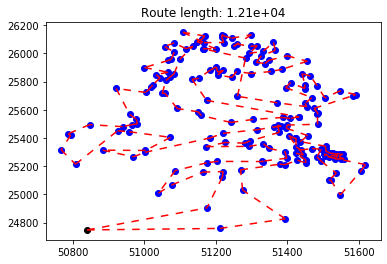

In [59]:
visualiseRoute(xs, ys, bestPathTest, bestPathLength)

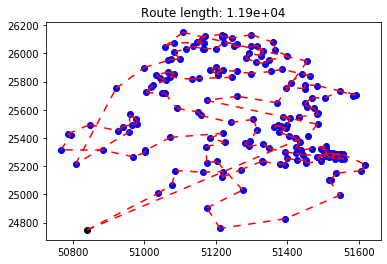

In [60]:
visualiseRoute(xs, ys, bestPathTest2, bestPathLength2)

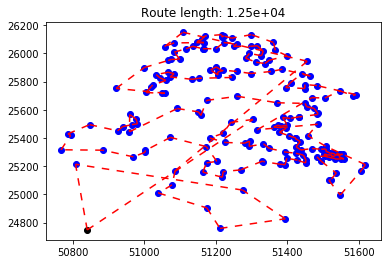

In [61]:
visualiseRoute(xs, ys, bestPathTest2b, bestPathLength2b)

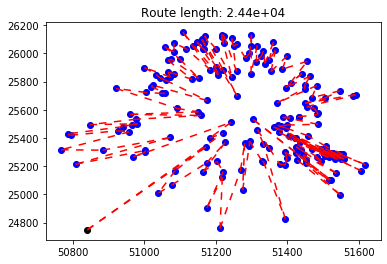

In [62]:
visualiseRoute(xs, ys, bestPathTest3, bestPathLength3)

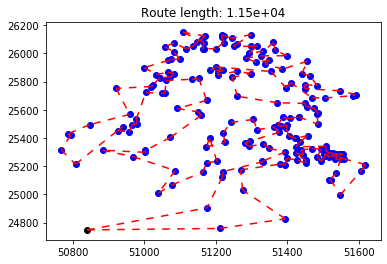

In [63]:
visualiseRoute(xs, ys, bestPathTest4, bestPathLength4)

In [64]:
def visualiseCurrentRoute(xs, ys, path):
    # for sub path visualisation when 0 does not belong to path
    routeLength = 0
    fig, ax = plt.subplots(1,1)
    dash = [5, 0]
    ax.scatter([-5,5],[-5,5], visible=False)
    ax.scatter(xs, ys, color='blue')
    ax.plot([xs[path[0]],xs[path[-1]]],[ys[path[0]],ys[path[-1]]], color='red', dashes=dash)
    routeLength+=distance(np.array([xs[path[0]],ys[path[0]]]),np.array([xs[path[-1]],ys[path[-1]]]))
    for i in range(len(path)-1):
        ax.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]], color='red', dashes=dash)
        routeLength+=distance(np.array([xs[path[i]],ys[path[i]]]),np.array([xs[path[i+1]],ys[path[i+1]]]))
    ax.set_title('Route length: {:.3}'.format(routeLength))

In [65]:
class pathAnimationDataHolder():
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys
        self.numPoints = len(xs)
        self.g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
        self.path = []     #points used in the path
        self.path_x = []   #x values of points, used to update g
        self.path_y = []   #y values of points, used to update
        self.outstanding = [i for i in range(self.numPoints)] 

        # find 3 closest points to g
        # VERSION 1: set 3 initial points
        
        #self.sortedOutstanding = sorted(self.outstanding, key = lambda i: distance(self.g,np.array([self.xs[i],self.ys[i]])))
        #for i in range(3):
        #    self.path.append(self.sortedOutstanding[i])
        #    self.path_x.append(xs[self.sortedOutstanding[i]])
        #    self.path_y.append(ys[self.sortedOutstanding[i]])

        #remove from sortedOutstanding by value
        #for i in range(3):
        #    self.outstanding.remove(self.path[i])
        
        
        # VERSION 2: randomly pick 3 first elements
        myList = random.sample(self.outstanding,3)
    
        for el in myList:
            self.path.append(el)
            self.path_x.append(xs[el])
            self.path_y.append(ys[el])
            self.outstanding.remove(el)
    

    # animation function.  This is called sequentially
    def addVertex(self):
        self.g = np.array([np.mean(self.path_x),np.mean(self.path_y)])
        #find closest point to g in list of outstanding points
        minDist = distance(self.g,np.array([self.xs[self.outstanding[0]],self.ys[self.outstanding[0]]]))
        minPos = 0
        for i in range(1, len(self.outstanding)):
            compDist = distance(self.g,np.array([self.xs[self.outstanding[i]],self.ys[self.outstanding[i]]]))
            if compDist < minDist:
                minDist = compDist
                minPos = i
        pNewName = self.outstanding[minPos]
        pNew = np.array([self.xs[pNewName],self.ys[pNewName]])

        p = np.array([self.xs[self.path[-1]],self.ys[self.path[-1]]])
        pNext = np.array([self.xs[self.path[0]],self.ys[self.path[0]]])
        minDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
        minPos = -1
        for i in range(len(self.path)-1):
            p = np.array([self.xs[self.path[i]],self.ys[self.path[i]]])
            pNext = np.array([self.xs[self.path[i+1]],self.ys[self.path[i+1]]])
            compDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
            if compDist < minDist:
                minDist = compDist
                minPos = i
        self.path.insert(minPos+1, pNewName)
        self.path_x.append(xs[pNewName])
        self.path_y.append(ys[pNewName])
        self.outstanding.remove(pNewName)


In [66]:
from matplotlib import animation, rc
from IPython.display import HTML

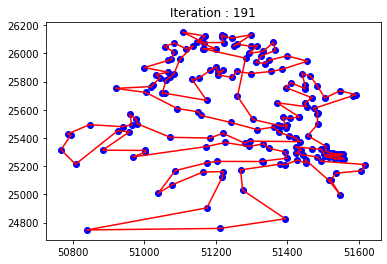

In [67]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
scat = ax.scatter([], [])

# initialization function: plot the background of each frame
def init():
    scat = ax.scatter([],[])
    return scat,

# animation function.  This is called sequentially
def animate(i, dataHolder):
    plt.cla()
    plt.title('Iteration : {}'.format(i))
    
    scat = ax.scatter(dataHolder.xs,dataHolder.ys, color='blue')
    ax.plot([dataHolder.xs[dataHolder.path[0]],dataHolder.xs[dataHolder.path[-1]]],[dataHolder.ys[dataHolder.path[0]],dataHolder.ys[dataHolder.path[-1]]], color='red')
    for i in range(len(dataHolder.path)-1):
        ax.plot([dataHolder.xs[dataHolder.path[i]],dataHolder.xs[dataHolder.path[i+1]]],[dataHolder.ys[dataHolder.path[i]],dataHolder.ys[dataHolder.path[i+1]]], color='red')
    if i>0 and i<dataHolder.numPoints-2:
        dataHolder.addVertex()
    return scat,

dataHold = pathAnimationDataHolder(xs,ys)
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, fargs=(dataHold,), init_func=init, frames=len(xs)-2, interval=200, blit=True)
rc('animation', html='html5')
anim

GA

In [68]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm
from jmetal.operator import BinaryTournamentSelection
from jmetal.operator.crossover import PMXCrossover
from jmetal.operator.mutation import PermutationSwapMutation
from jmetal.problem.singleobjective.tsp import TSP
from jmetal.util.comparator import MultiComparator
from jmetal.util.density_estimator import CrowdingDistance
from jmetal.util.ranking import FastNonDominatedRanking
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.core.solution import PermutationSolution
from jmetal.util.evaluator import SequentialEvaluator
import jmetal.core.algorithm
from jmetal.core.operator import Mutation, Crossover, Selection

In [69]:
class myTSP(TSP):
    def __init__(self, distMatrix, numPoints ):
        super(TSP, self).__init__()

        self.distance_matrix = distMatrix
        self.obj_directions = [self.MINIMIZE]
        self.number_of_variables = numPoints
        self.number_of_objectives = 1
        self.number_of_constraints = 0

In [70]:
def reformatGASolution(gaSol):
    zeroPos = gaSol.index(0)
    formatgaSol=[]
    for i in range(zeroPos+1,numPoints):
        formatgaSol.append(gaSol[i])
    for i in range(0,zeroPos):
        formatgaSol.append(gaSol[i])
    return formatgaSol

In [72]:
problem = myTSP(dists, numPoints)

maxGen = 100
popSize = 100
offSpringSize = 100

algorithm = GeneticAlgorithm(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(0.4),
    crossover=PMXCrossover(1.0),
    selection=BinaryTournamentSelection(MultiComparator([FastNonDominatedRanking.get_comparator(), CrowdingDistance.get_comparator()])),
    termination_criterion=StoppingByEvaluations(max_evaluations=popSize+maxGen*offSpringSize),
    #population_evaluator = SequentialEvaluator()
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('GA Solution')
#print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))

print('\nBest Solution')
#print('best Path: {}'.format(bestPathTest))
print('best Path: {}'.format(bestPathLength))

print('\nglobal optimum: 9352')


GA Solution
Fitness: 52224.875247521464
Computing time: 19.94935941696167

Best Solution
best Path: 12060.236506070274

global optimum: 9352


In [73]:
from jmetal.config import store
from jmetal.core.problem import Problem
from jmetal.core.operator import Mutation, Crossover, Selection
from jmetal.util.termination_criterion import TerminationCriterion
from jmetal.util.evaluator import Evaluator
from jmetal.util.generator import Generator
from typing import TypeVar, List
from jmetal.operator.crossover import CXCrossover
from jmetal.operator import BestSolutionSelection
import random
S = TypeVar('S')

In [74]:
class GeneticAlgorithmExt(GeneticAlgorithm):
    def __init__(self,
                 problem: Problem,
                 population_size: int,
                 offspring_population_size: int,
                 mutation: Mutation,
                 crossover: Crossover,
                 selection: Selection,
                 termination_criterion: TerminationCriterion = store.default_termination_criteria,
                 population_generator: Generator = store.default_generator,
                 population_evaluator: Evaluator = store.default_evaluator):
        super(GeneticAlgorithmExt, self).__init__(problem, population_size, offspring_population_size, mutation, crossover, selection, termination_criterion, population_generator, population_evaluator)
        self.averageFitHisto = []
        self.bestFitHisto = []
        self.intCount = 0
    def update_progress(self):
        self.evaluations += self.offspring_population_size

        observable_data = self.get_observable_data()
        self.observable.notify_all(**observable_data)
        
        self.intCount+=1
        fits  = np.array([sol.objectives[0] for sol in self.solutions])
        self.averageFitHisto.append(np.mean(fits))
        self.bestFitHisto.append(np.min(fits))
        

In [75]:
class RouletteWheelSelection2(Selection[List[S], S]):
    """Performs roulette wheel selection.
    """

    def __init__(self):
        super(RouletteWheelSelection2).__init__()

    def execute(self, front: List[S]) -> S:
        if front is None:
            raise Exception('The front is null')
        elif len(front) == 0:
            raise Exception('The front is empty')

        maximum = sum([solution.objectives[0] for solution in front])
        rand = random.uniform(0.0, maximum)
        value = 0.0

        for solution in front:
            value += solution.objectives[0]

            if value > rand:
                return solution

        return None

    def get_name(self) -> str:
        return 'Roulette wheel selection'




GA Solution
Fitness: 40439.56762043517
Computing time: 172.84844088554382
average fit 43596.87641523693

Best Solution
best Path: 12060.236506070274

global optimum: 9352


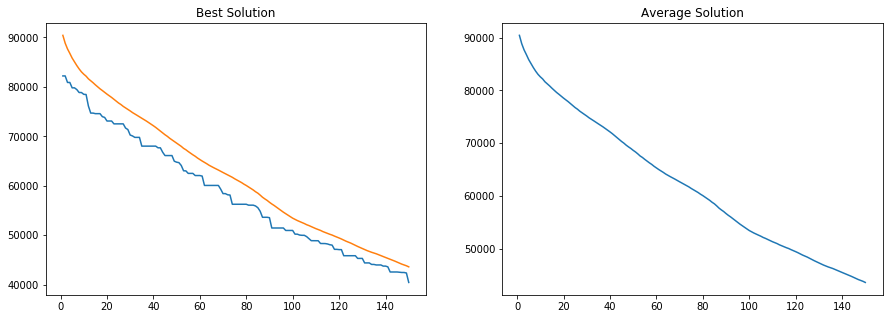

In [77]:
problem = myTSP(dists, numPoints)

maxGen = 150
popSize = 500
offSpringSize = 500

algorithm = GeneticAlgorithmExt(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(0.4),
    crossover=PMXCrossover(1.0),
    #selection=BinaryTournamentSelection(MultiComparator([FastNonDominatedRanking.get_comparator(), CrowdingDistance.get_comparator()])),
    #selection = BestSolutionSelection(),
    selection = RouletteWheelSelection2(),
    termination_criterion=StoppingByEvaluations(max_evaluations=popSize + maxGen*offSpringSize)
    #population_evaluator = SequentialEvaluator()
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('\n\nGA Solution')
#print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))
print('average fit {}'.format(algorithm.averageFitHisto[-1]))

print('\nBest Solution')
#print('best Path: {}'.format(bestPathTest))
print('best Path: {}\n'.format(bestPathLength))

print('global optimum: 9352')


fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot([i for i in range(1, maxGen+1)], algorithm.bestFitHisto)
ax[0].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[0].title.set_text('Best Solution')
ax[1].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[1].title.set_text('Average Solution')

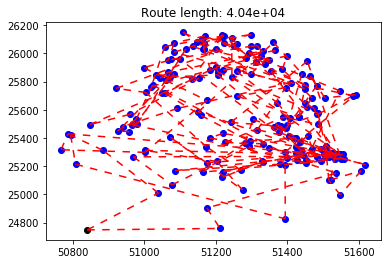

In [78]:
visualiseRoute(xs, ys, gaSol, result.objectives[0])

In [79]:
import random

In [80]:
class GeneticAlgorithmExt2(GeneticAlgorithm):
    def __init__(self,
                 problem: Problem,
                 population_size: int,
                 offspring_population_size: int,
                 guessBest: None,
                 mutation: Mutation,
                 crossover: Crossover,
                 selection: Selection,
                 termination_criterion: TerminationCriterion = store.default_termination_criteria,
                 population_generator: Generator = store.default_generator,
                 population_evaluator: Evaluator = store.default_evaluator):
        super(GeneticAlgorithmExt2, self).__init__(problem, population_size, offspring_population_size, mutation, crossover, selection, termination_criterion, population_generator, population_evaluator)
        self.averageFitHisto = []
        self.bestFitHisto = []
        self.intCount = 0
        self.initBest = guessBest
    def update_progress(self):
        self.evaluations += self.offspring_population_size

        observable_data = self.get_observable_data()
        self.observable.notify_all(**observable_data)
        
        self.intCount+=1
        fits  = np.array([sol.objectives[0] for sol in self.solutions])
        self.averageFitHisto.append(np.mean(fits))
        self.bestFitHisto.append(np.min(fits))
    def create_initial_solutions(self) -> List[S]:
        numVar = self.problem.number_of_variables
        numObj = self.problem.number_of_objectives
        
        new_solution = PermutationSolution(number_of_variables=numVar,
                                           number_of_objectives=numObj)
        new_solution.variables = self.initBest
        
        res = [self.population_generator.new(self.problem)
                for _ in range(1,self.population_size)]
        res = res+ [new_solution]
        return res




GA Solution
Fitness: 11893.862825057704
Computing time: 163.10044050216675
average fit 11904.784726268956

Best Solution
best Path: 12060.236506070274

global optimum: 9352



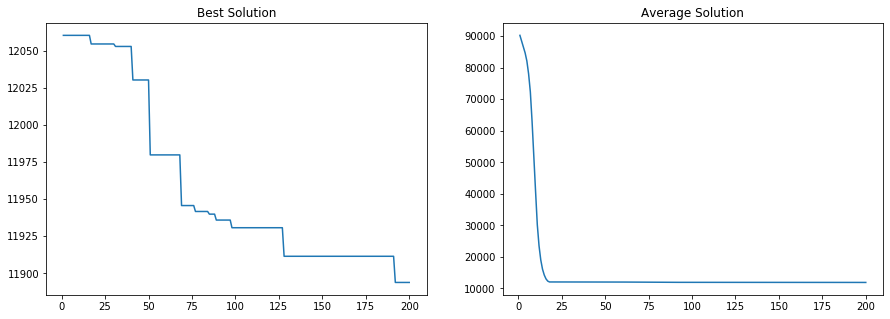

In [30]:
problem = myTSP(dists, numPoints)

maxGen = 150
popSize = 500
offSpringSize = 500

algorithm = GeneticAlgorithmExt2(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    guessBest = bestPathTest + [0],
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(26.0 / problem.number_of_variables),
    crossover=PMXCrossover(0.7),
    selection=BinaryTournamentSelection(MultiComparator([FastNonDominatedRanking.get_comparator(), CrowdingDistance.get_comparator()])),
    #selection = BestSolutionSelection(), 
    termination_criterion=StoppingByEvaluations(max=popSize + maxGen*offSpringSize)
    #population_evaluator = SequentialEvaluator()
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('\n\nGA Solution')
#print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))
print('average fit {}'.format(algorithm.averageFitHisto[-1]))

print('\nBest Solution')
#print('best Path: {}'.format(bestPathTest))
print('best Path: {}\n'.format(bestPathLength))

print('global optimum: 9352\n')

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot([i for i in range(1, maxGen+1)], algorithm.bestFitHisto)
#ax[0].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[0].title.set_text('Best Solution')
ax[1].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[1].title.set_text('Average Solution')

In [82]:
class GeneticAlgorithmExt3(GeneticAlgorithm):
    def __init__(self,
                 problem: Problem,
                 population_size: int,
                 offspring_population_size: int,
                 xs: None,
                 ys: None,
                 mutation: Mutation,
                 crossover: Crossover,
                 selection: Selection,
                 termination_criterion: TerminationCriterion = store.default_termination_criteria,
                 population_generator: Generator = store.default_generator,
                 population_evaluator: Evaluator = store.default_evaluator):
        super(GeneticAlgorithmExt3, self).__init__(problem, population_size, offspring_population_size, mutation, crossover, selection, termination_criterion, population_generator, population_evaluator)
        self.averageFitHisto = []
        self.bestFitHisto = []
        self.intCount = 0
        self.xs = xs
        self.ys = ys
    def update_progress(self):
        self.evaluations += self.offspring_population_size

        observable_data = self.get_observable_data()
        self.observable.notify_all(**observable_data)
        
        self.intCount+=1
        fits  = np.array([sol.objectives[0] for sol in self.solutions])
        self.averageFitHisto.append(np.mean(fits))
        self.bestFitHisto.append(np.min(fits))
    def create_initial_solutions(self) -> List[S]:
        numVar = self.problem.number_of_variables
        numObj = self.problem.number_of_objectives
        res = []
        
        for i in range(self.population_size):
            curPath = computeBestPath4(self.xs, self.ys) + [0]
            new_solution = PermutationSolution(number_of_variables=numVar, number_of_objectives=numObj)
            new_solution.variables = curPath
            res.append(new_solution)

        return res



GA Solution
Fitness: 11130.23180269771
Computing time: 60.614832639694214
average fit 11130.231802697708

Best Solution
best Path: 12060.236506070274

global optimum: 9352



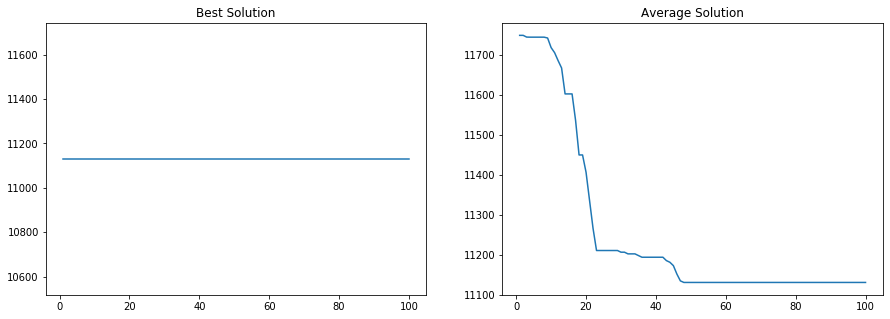

In [85]:
problem = myTSP(dists, numPoints)

maxGen = 100
popSize = 20
offSpringSize = 20

algorithm = GeneticAlgorithmExt3(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    xs = xs,
    ys = ys,
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(0.5),
    crossover=PMXCrossover(1.0),
    selection=BinaryTournamentSelection(MultiComparator([FastNonDominatedRanking.get_comparator(), CrowdingDistance.get_comparator()])),
    #selection = BestSolutionSelection(), 
    termination_criterion=StoppingByEvaluations(max_evaluations=popSize + maxGen*offSpringSize)
    #population_evaluator = SequentialEvaluator()
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('\n\nGA Solution')
#print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))
print('average fit {}'.format(algorithm.averageFitHisto[-1]))

print('\nBest Solution')
#print('best Path: {}'.format(bestPathTest))
print('best Path: {}\n'.format(bestPathLength))

print('global optimum: 9352\n')

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot([i for i in range(1, maxGen+1)], algorithm.bestFitHisto)
#ax[0].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[0].title.set_text('Best Solution')
ax[1].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[1].title.set_text('Average Solution')

Alternative GA

In [31]:
from sklearn.cluster import KMeans

In [38]:
numClusters = 100
kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(np.column_stack((xs,ys)))
xList = []
yList = []
nameList = []
for i in range(numClusters):
    xList.append([])
    yList.append([])
    nameList.append([])
    
for i in range(numPoints):
    groupNum = kmeans.labels_[i]
    xList[groupNum].append(xs[i])
    yList[groupNum].append(ys[i]) 
    nameList[groupNum].append(i)

print('smallest group: {}'.format(min([len(xi) for xi in xList])))
print('biggest group: {}'.format(max([len(xi) for xi in xList])))


smallest group: 1
biggest group: 13


In [34]:
def visualiseGroups(xList, yList):
    fig, ax = plt.subplots(1,1)
    for i in range(len(xList)):
        ax.scatter(xList[i], yList[i])

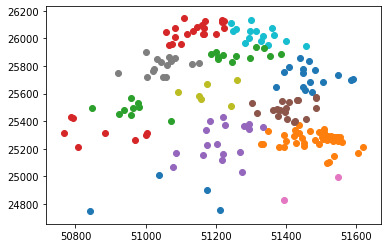

In [35]:
visualiseGroups(xList,yList)

In [418]:
def TSP_exhaustiveSolve(dists):
    # the starting point is assumed to be p_O.
    # a path is then just a permutation of points 1,2,...,n
    # If we had considered permutations of 0,1,2,...n we would consider the same path several times
    # as 0,1,2,...,n is equivalent to 3,4,...,n,0,1,2
    # so starting from 0 reduces the number of permutations we need to consider
    
    # Further optimisation is possible since paths 0,1,2,...,n and 0,n,n-1,...,2,1 are equivalent
    
    # if we had allowed any point to be the starting point
    timeStart = time.time()
    numPoints = dists.shape[0]
    bestPath = [i for i in range(1, numPoints)]
    bestPathLength = routeLength(bestPath, dists)
    permIter = itertools.permutations(bestPath)
    allPaths = []
    keepLoop = True
    while keepLoop:
        try:
            checkPath = next(permIter)
            checkPathLength = routeLength(checkPath, dists)
            allPaths.append(checkPathLength)
            if checkPathLength < bestPathLength:
                bestPathLength = checkPathLength
                bestPath = [el for el in checkPath]
        except StopIteration:
            keepLoop = False
    timeEnd = time.time()
    timeLength = timeEnd-timeStart
    
    return bestPath, bestPathLength, timeLength

In [419]:
#exhaustive search TSP for each subgroup. Could be parallelised

distMatrices = []
optimalSubPaths = []
optimalSubLengths = []
for i in range(numClusters):
    distMat = createDistanceMatrix(xList[i], yList[i])
    optimalSubPath, optimalSubLength, runDuration = TSP_exhaustiveSolve(distMat)
    optimalSubPaths.append(optimalSubPath)
    optimalSubLengths.append(optimalSubLength)

In [420]:
def visualiseSubPaths(xList, yList, optimalSubPaths):
    fig, ax = plt.subplots(1,1)
    
    #ax.scatter([-5,5],[-5,5], visible=False)
    for i in range(len(xList)):
        xs = xList[i]
        ys = yList[i]
        numPoints = len(xs)
        path = optimalSubPaths[i]
        ax.scatter(xs, ys, color='blue')
        ax.plot([xs[0],xs[path[0]]],[ys[0],ys[path[0]]], color='red')
        for i in range(numPoints-2):
            ax.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]], color='red')
        ax.plot([xs[0],xs[path[-1]]],[ys[0],ys[path[-1]]], color='red')
    

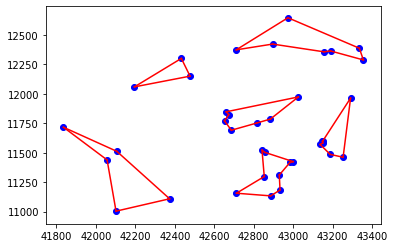

In [421]:
visualiseSubPaths(xList, yList, optimalSubPaths)

In [422]:
class myTSP2(TSP):
    def __init__(self, distMatrix, numPoints, nameList):
        super(TSP, self).__init__()

        self.distance_matrix = distMatrix
        self.name_list = nameList

        self.obj_directions = [self.MINIMIZE]
        self.number_of_variables = numPoints
        self.number_of_objectives = 1
        self.number_of_constraints = 0
    
    def create_solution(self) -> PermutationSolution:
        # The idea is to reuse subsequences obtained from piecewise optimisation performed 
        # on subgroups obtained via kmeans, so that the initial population has 
        # some preoptimised sequences and convergence might be quicker.
        # global recombination from optimised sequences done at random
        # can be improved
        
        new_solution = PermutationSolution(number_of_variables=self.number_of_variables,
                                           number_of_objectives=self.number_of_objectives)
        #new_solution.variables = random.sample(range(self.number_of_variables), k=self.number_of_variables)
        
        randShuf = np.arange(len(self.name_list))
        np.random.shuffle(randShuf)
        
        #sampleSol = [pt for pt in nameList[el] for el in randShuf]
        sampleSol = []
        for el in randShuf:
            seq = nameList[el]
            for pt in seq:
                sampleSol.append(pt)
        new_solution.variables = sampleSol
        
        return new_solution

GA Solution
Solution: [9, 13, 20, 28, 29, 31, 34, 36, 37, 30, 35, 32, 33, 21, 19, 22, 23, 24, 25, 27, 26, 18, 15, 16, 17, 11, 10, 3, 2, 4, 5, 6, 7, 8, 12, 14, 1]
Best Path: 8403.145037025048
Computing time: 2.757875680923462


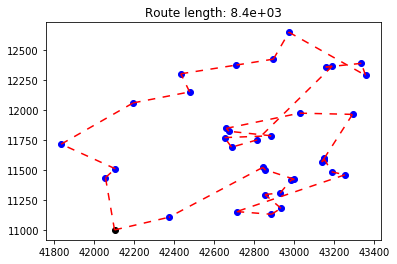

In [425]:
problem = myTSP2(dists, numPoints, nameList)

maxGen = 60
popSize = 200
offSpringSize = 200

algorithm = GeneticAlgorithm(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    mutation=PermutationSwapMutation(5.0 / problem.number_of_variables),
    crossover=PMXCrossover(0.7),
    selection=BinaryTournamentSelection(
    MultiComparator([FastNonDominatedRanking.get_comparator(),
                                 CrowdingDistance.get_comparator()])),
    termination_criterion=StoppingByEvaluations(max=popSize+maxGen*offSpringSize)
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
IGA_bestPath = result.objectives[0]
print('GA Solution')
print('Solution: {}'.format(gaSol))
print('Best Path: {}'.format(IGA_bestPath))
print('Computing time: {}'.format(algorithm.total_computing_time))

visualiseRoute(xs, ys, gaSol, result.objectives[0])



GA Solution
Fitness: 7717.504890188314
Computing time: 56.20008444786072
average fit 7717.504890188314

Best Solution
best Path: 8168.130299691751

global optimum: 6656



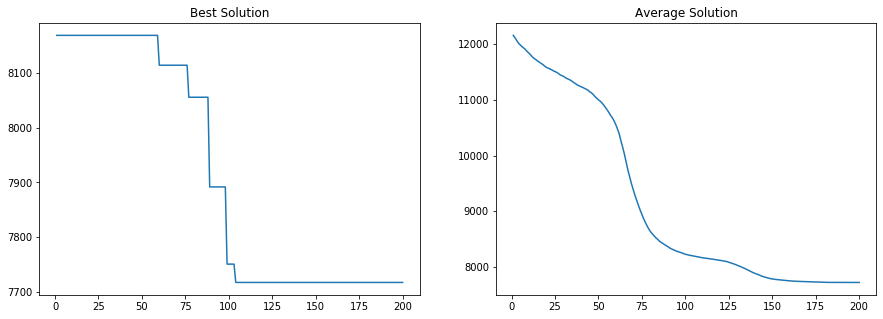

In [434]:
problem = myTSP2(dists, numPoints, nameList)

maxGen = 200
popSize = 1000
offSpringSize = 1000

algorithm = GeneticAlgorithmExt2(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    guessBest = bestPathTest + [0],
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(36 / problem.number_of_variables),
    crossover=PMXCrossover(0.95),
    selection=BinaryTournamentSelection(MultiComparator([FastNonDominatedRanking.get_comparator(), CrowdingDistance.get_comparator()])),
    #selection = BestSolutionSelection(), 
    termination_criterion=StoppingByEvaluations(max=popSize + maxGen*offSpringSize)
    #population_evaluator = SequentialEvaluator()
    )


#***********************
algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('\n\nGA Solution')
#print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))
print('average fit {}'.format(algorithm.averageFitHisto[-1]))

print('\nBest Solution')
#print('best Path: {}'.format(bestPathTest))
print('best Path: {}\n'.format(bestPathLength))

print('global optimum: 6656\n')

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot([i for i in range(1, maxGen+1)], algorithm.bestFitHisto)
#ax[0].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[0].title.set_text('Best Solution')
ax[1].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[1].title.set_text('Average Solution')
#*********************




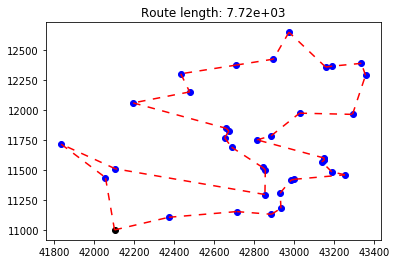

In [432]:
visualiseRoute(xs, ys, gaSol, result.objectives[0])

In [86]:
def computeBestPath_sub(initialList, xs, ys):
    # same as init but randomly pick 3 points to start

    #g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
    path = []     #points used in the path
    path_x = []   #x values of points, used to update g
    path_y = []   #y values of points, used to update
    outstanding = [i for i in range(numPoints)] 
    
    funcDists = createDistanceMatrix(xs, ys)
    
    for el in initialList:
        path.append(el)
        path_x.append(xs[el])
        path_y.append(ys[el])
        outstanding.remove(el)        

    for count in range(0, numPoints-3):
        g = np.array([np.mean(path_x),np.mean(path_y)])
        
        sortedOutstanding = sorted(outstanding, key = lambda i: distance(g,np.array([xs[i],ys[i]])))
        pNewName = sortedOutstanding[0]
        pNew = np.array([xs[pNewName],ys[pNewName]])
        
        p = np.array([xs[path[-1]],ys[path[-1]]])
        pNext = np.array([xs[path[0]],ys[path[0]]])
        
        pName = path[-1]
        pNextName = path[0]
        minDist = funcDists[pNewName, pName] + funcDists[pNewName, pNextName] - funcDists[pName, pNextName]        
        
        minPos = -1
        for i in range(len(path)-1):
            p = np.array([xs[path[i]],ys[path[i]]])
            pNext = np.array([xs[path[i+1]],ys[path[i+1]]])
            pName = path[i]
            pNextName = path[i+1]
            compDist = funcDists[pNewName, pName] + funcDists[pNewName, pNextName] - funcDists[pName, pNextName]
            if compDist < minDist:
                minDist = compDist
                minPos = i

        path.insert(minPos+1, pNewName)
        path_x.append(xs[pNewName])
        path_y.append(ys[pNewName])
        outstanding.remove(pNewName)

    zeroPos = path.index(0)
    res = path[zeroPos+1:] + path[:zeroPos]
        
    return res

In [87]:
g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
sortedOutstanding = sorted([i for i in range(numPoints)], key = lambda i: distance(g,np.array([xs[i],ys[i]])))
initialList = [sortedOutstanding[i] for i in range(3)]


12060.236506070274


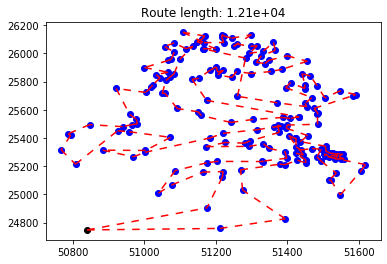

In [88]:
testPath = computeBestPath_sub(initialList, xs, ys)
testPathLength = routeLength(testPath, dists)
print(testPathLength)
visualiseRoute(xs, ys, testPath, testPathLength)

In [89]:
initialList = random.sample(range(numPoints),3)
bestInit = None
testPath = computeBestPath_sub(initialList, xs, ys)
testPathLength = routeLength(testPath, dists)
bestPath = testPath
bestLength = testPathLength

startTime = time.time()

for i in range(1, 10):
    initialList = random.sample(range(numPoints),3)
    testPath = computeBestPath_sub(initialList, xs, ys)
    testPathLength = routeLength(testPath, dists)
    if testPathLength < bestLength:
        bestLength = testPathLength
        bestInit = list(initialList)
        bestPath = testPath

endTime = time.time()
runTime = endTime - startTime
print(runTime)

print(bestLength)

32.107887268066406
11042.089672060265


In [149]:
class pathAnimationDataHolder2():
    def __init__(self, initialList, xs, ys):
        self.xs = xs
        self.ys = ys
        self.numPoints = len(xs)
        self.g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
        self.path = []     #points used in the path
        self.path_x = []   #x values of points, used to update g
        self.path_y = []   #y values of points, used to update
        self.outstanding = [i for i in range(self.numPoints)] 
    
        for el in initialList:
            self.path.append(el)
            self.path_x.append(xs[el])
            self.path_y.append(ys[el])
            self.outstanding.remove(el)
    
    # animation function.  This is called sequentially
    def addVertex(self):
        self.g = np.array([np.mean(self.path_x),np.mean(self.path_y)])
        #find closest point to g in list of outstanding points
        minDist = distance(self.g,np.array([self.xs[self.outstanding[0]],self.ys[self.outstanding[0]]]))
        minPos = 0
        for i in range(1, len(self.outstanding)):
            compDist = distance(self.g,np.array([self.xs[self.outstanding[i]],self.ys[self.outstanding[i]]]))
            if compDist < minDist:
                minDist = compDist
                minPos = i
        pNewName = self.outstanding[minPos]
        pNew = np.array([self.xs[pNewName],self.ys[pNewName]])

        p = np.array([self.xs[self.path[-1]],self.ys[self.path[-1]]])
        pNext = np.array([self.xs[self.path[0]],self.ys[self.path[0]]])
        minDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
        minPos = -1
        for i in range(len(self.path)-1):
            p = np.array([self.xs[self.path[i]],self.ys[self.path[i]]])
            pNext = np.array([self.xs[self.path[i+1]],self.ys[self.path[i+1]]])
            compDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
            if compDist < minDist:
                minDist = compDist
                minPos = i
        self.path.insert(minPos+1, pNewName)
        self.path_x.append(xs[pNewName])
        self.path_y.append(ys[pNewName])
        self.outstanding.remove(pNewName)


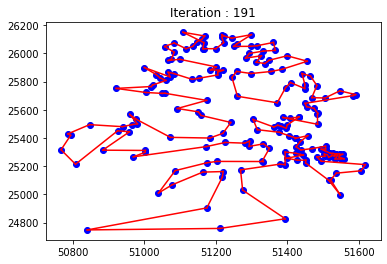

In [150]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
scat = ax.scatter([], [])

# initialization function: plot the background of each frame
def init():
    scat = ax.scatter([],[])
    return scat,

# animation function.  This is called sequentially
def animate(i, dataHolder):
    plt.cla()
    plt.title('Iteration : {}'.format(i))
    
    scat = ax.scatter(dataHolder.xs,dataHolder.ys, color='blue')
    ax.plot([dataHolder.xs[dataHolder.path[0]],dataHolder.xs[dataHolder.path[-1]]],[dataHolder.ys[dataHolder.path[0]],dataHolder.ys[dataHolder.path[-1]]], color='red')
    for i in range(len(dataHolder.path)-1):
        ax.plot([dataHolder.xs[dataHolder.path[i]],dataHolder.xs[dataHolder.path[i+1]]],[dataHolder.ys[dataHolder.path[i]],dataHolder.ys[dataHolder.path[i+1]]], color='red')
    if i>0 and i<dataHolder.numPoints-2:
        dataHolder.addVertex()
    return scat,

dataHold = pathAnimationDataHolder2(bestInit, xs,ys)
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, fargs=(dataHold,), init_func=init, frames=len(xs)-2, interval=500, blit=True)
rc('animation', html='html5')
anim

11532.48585616444


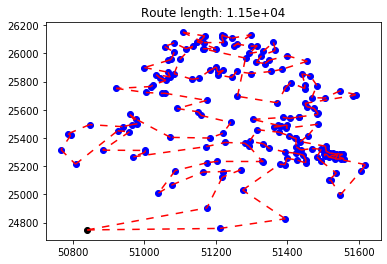

In [34]:
AList = random.sample(range(numPoints),3)
pathA = computeBestPath_sub(AList, xs, ys)
pathALength = routeLength(pathA, dists)
print(pathALength)
visualiseRoute(xs, ys, pathA, pathALength)

12060.236506070274


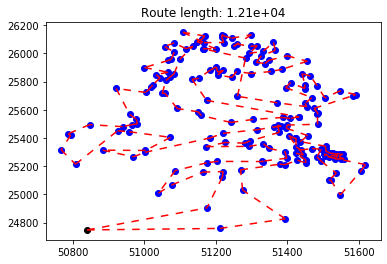

In [35]:
g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
sortedOutstanding = sorted([i for i in range(numPoints)], key = lambda i: distance(g,np.array([xs[i],ys[i]])))
BList = [sortedOutstanding[i] for i in range(3)]

pathB = computeBestPath_sub(BList, xs, ys)
pathBLength = routeLength(pathB, dists)
print(pathBLength)
visualiseRoute(xs, ys, pathB, pathBLength)

11261.414246399705


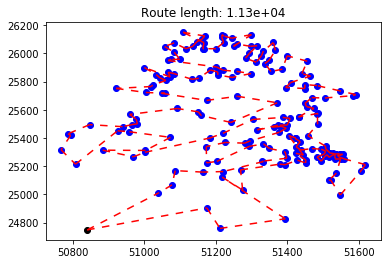

In [36]:
CList = bestInit

pathC = computeBestPath_sub(CList, xs, ys)
pathCLength = routeLength(pathC, dists)
print(pathCLength)
visualiseRoute(xs, ys, pathC, pathCLength)